# LRP for the transynergy model 
With the zennit library by bosch: https://github.com/chr5tphr/zennit

In [1]:
# !pip install torchsummary
#! pip install zennit

In [2]:
import os

os.chdir(os.path.abspath(os.path.join(os.getcwd(), "../..")))
print(os.getcwd())

c:\Users\ismyn\UNI\FU Berlin\SWP_Cancer\Drug-Inhibitor-Cancer-Treatment


We need to find the right rule for each model layer, let's examine it first

In [3]:
from explainability.utils import load_transynergy_model, load_biomining_model

model_trans = load_transynergy_model("external/drug_combination/trans_synergy/data/models/fold_test_model.pt") 
model_biomining = load_biomining_model("external/predicting_synergy_nn/outputs/models/best_f1.pt")

## Biomining

We add lrp-rules only to the Linear layers. We merge the batchnorms into the linear layers with SequentialMergeBatchNorm, ReLUs are ignored as indicated here:  https://zennit.readthedocs.io/en/0.4.4/how-to/use-rules-composites-and-canonizers.html .

For the LRP-rules in the linear layers we make use of: https://iphome.hhi.de/samek/pdf/MonXAI19.pdf. We use LRP-0 in the top layers, LRP-epsilon in the middle layers and the LRP-gamma in the bottom 2 layers, as advised.

In [4]:
print(model_biomining)

SynergyModel(
  (net): Sequential(
    (0): Linear(in_features=33, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=128, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=256, out_features=512, bias=True)
    (17): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, trac

## Explainations LRP for Biomining


In [5]:
import numpy as np
from explainability.data_utils import load_biomining_cell_line_data, load_biomining_data, load_biomining_drug_names
from explainability.explaination_config import ExplainationConfig

config = ExplainationConfig(
    paper="biomining",
)
cell_line_data = load_biomining_cell_line_data(split = 'test')
drug_name_a, drug_name_b = load_biomining_drug_names(split= 'test')
X, Y = load_biomining_data(split = 'test')

relevances = np.load("explainability/lrp/results/biomining_subsample_False/relevances.npy")
feature_names = config.feature_names


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [6]:
print(relevances[0])
print(Y[0])

[ 5.0005288e-04 -3.6099346e-03 -5.5527431e-05  7.3037425e-04
  1.3197954e-03  5.8648582e-03  5.9024375e-03  8.6884173e-03
  4.7207763e-03 -1.1727214e-04 -4.2957636e-03  1.0413546e-03
 -3.6086980e-04  2.4691338e-03  6.8001938e-03 -1.7478382e-03
 -1.8938042e-03  9.7268019e-03  6.0692346e-03  1.5699197e-02
  7.3290020e-03  5.0900574e-03  2.7321749e-03 -1.2447199e-02
  3.5251766e-03  3.3302717e-03  3.0040997e-03  4.4992422e-03
  2.3976292e-03 -5.1739970e-03 -6.5444079e-03  1.0239931e-02
  2.2933821e-03]
-10.39


In [7]:
idx = 11

print( Y[idx], relevances[idx].sum())

-6.1 0.023746315


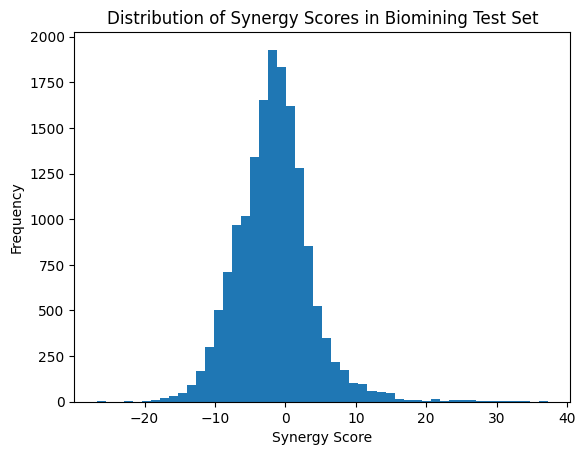

In [8]:
# plot a disribution of y 
import matplotlib.pyplot as plt
plt.hist(Y, bins=50)
plt.xlabel("Synergy Score")
plt.ylabel("Frequency")
plt.title("Distribution of Synergy Scores in Biomining Test Set")   
plt.show()


Top features for BT549 (sorted by 90th percentile relevance in top synergy samples):
Feature                   Mean Relevance
--------------------------------------
FLT1                          0.0071
PDGFRBb                       0.0047
NR1I2b                        0.0042
KITb                          0.0036
RET                           0.0033
NR1I2                         0.0030
TUB1b                         0.0028
KDR                           0.0025
CSF1Rb                        0.0025
ABLb                          0.0020
RAS                           0.0019
FLT4b                         0.0018
KIT                           0.0017
NF1                           0.0014
TOP2b                         0.0012
TOP2                          0.0012
P53                           0.0011
EGFR                          0.0004
MCL1b                         0.0002
RETb                          0.0002
GATA3                         0.0000
TUB1                         -0.0002
FLT1b               

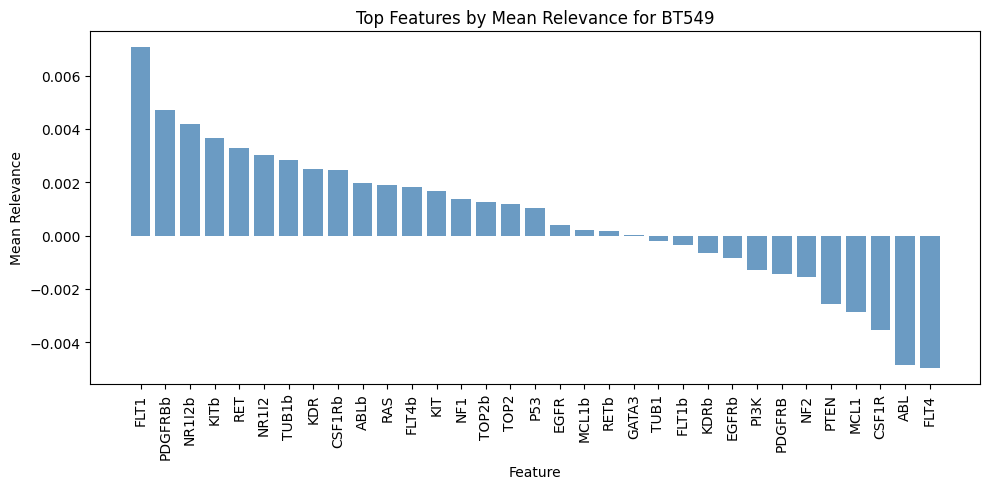

Number of samples for BT549: 322


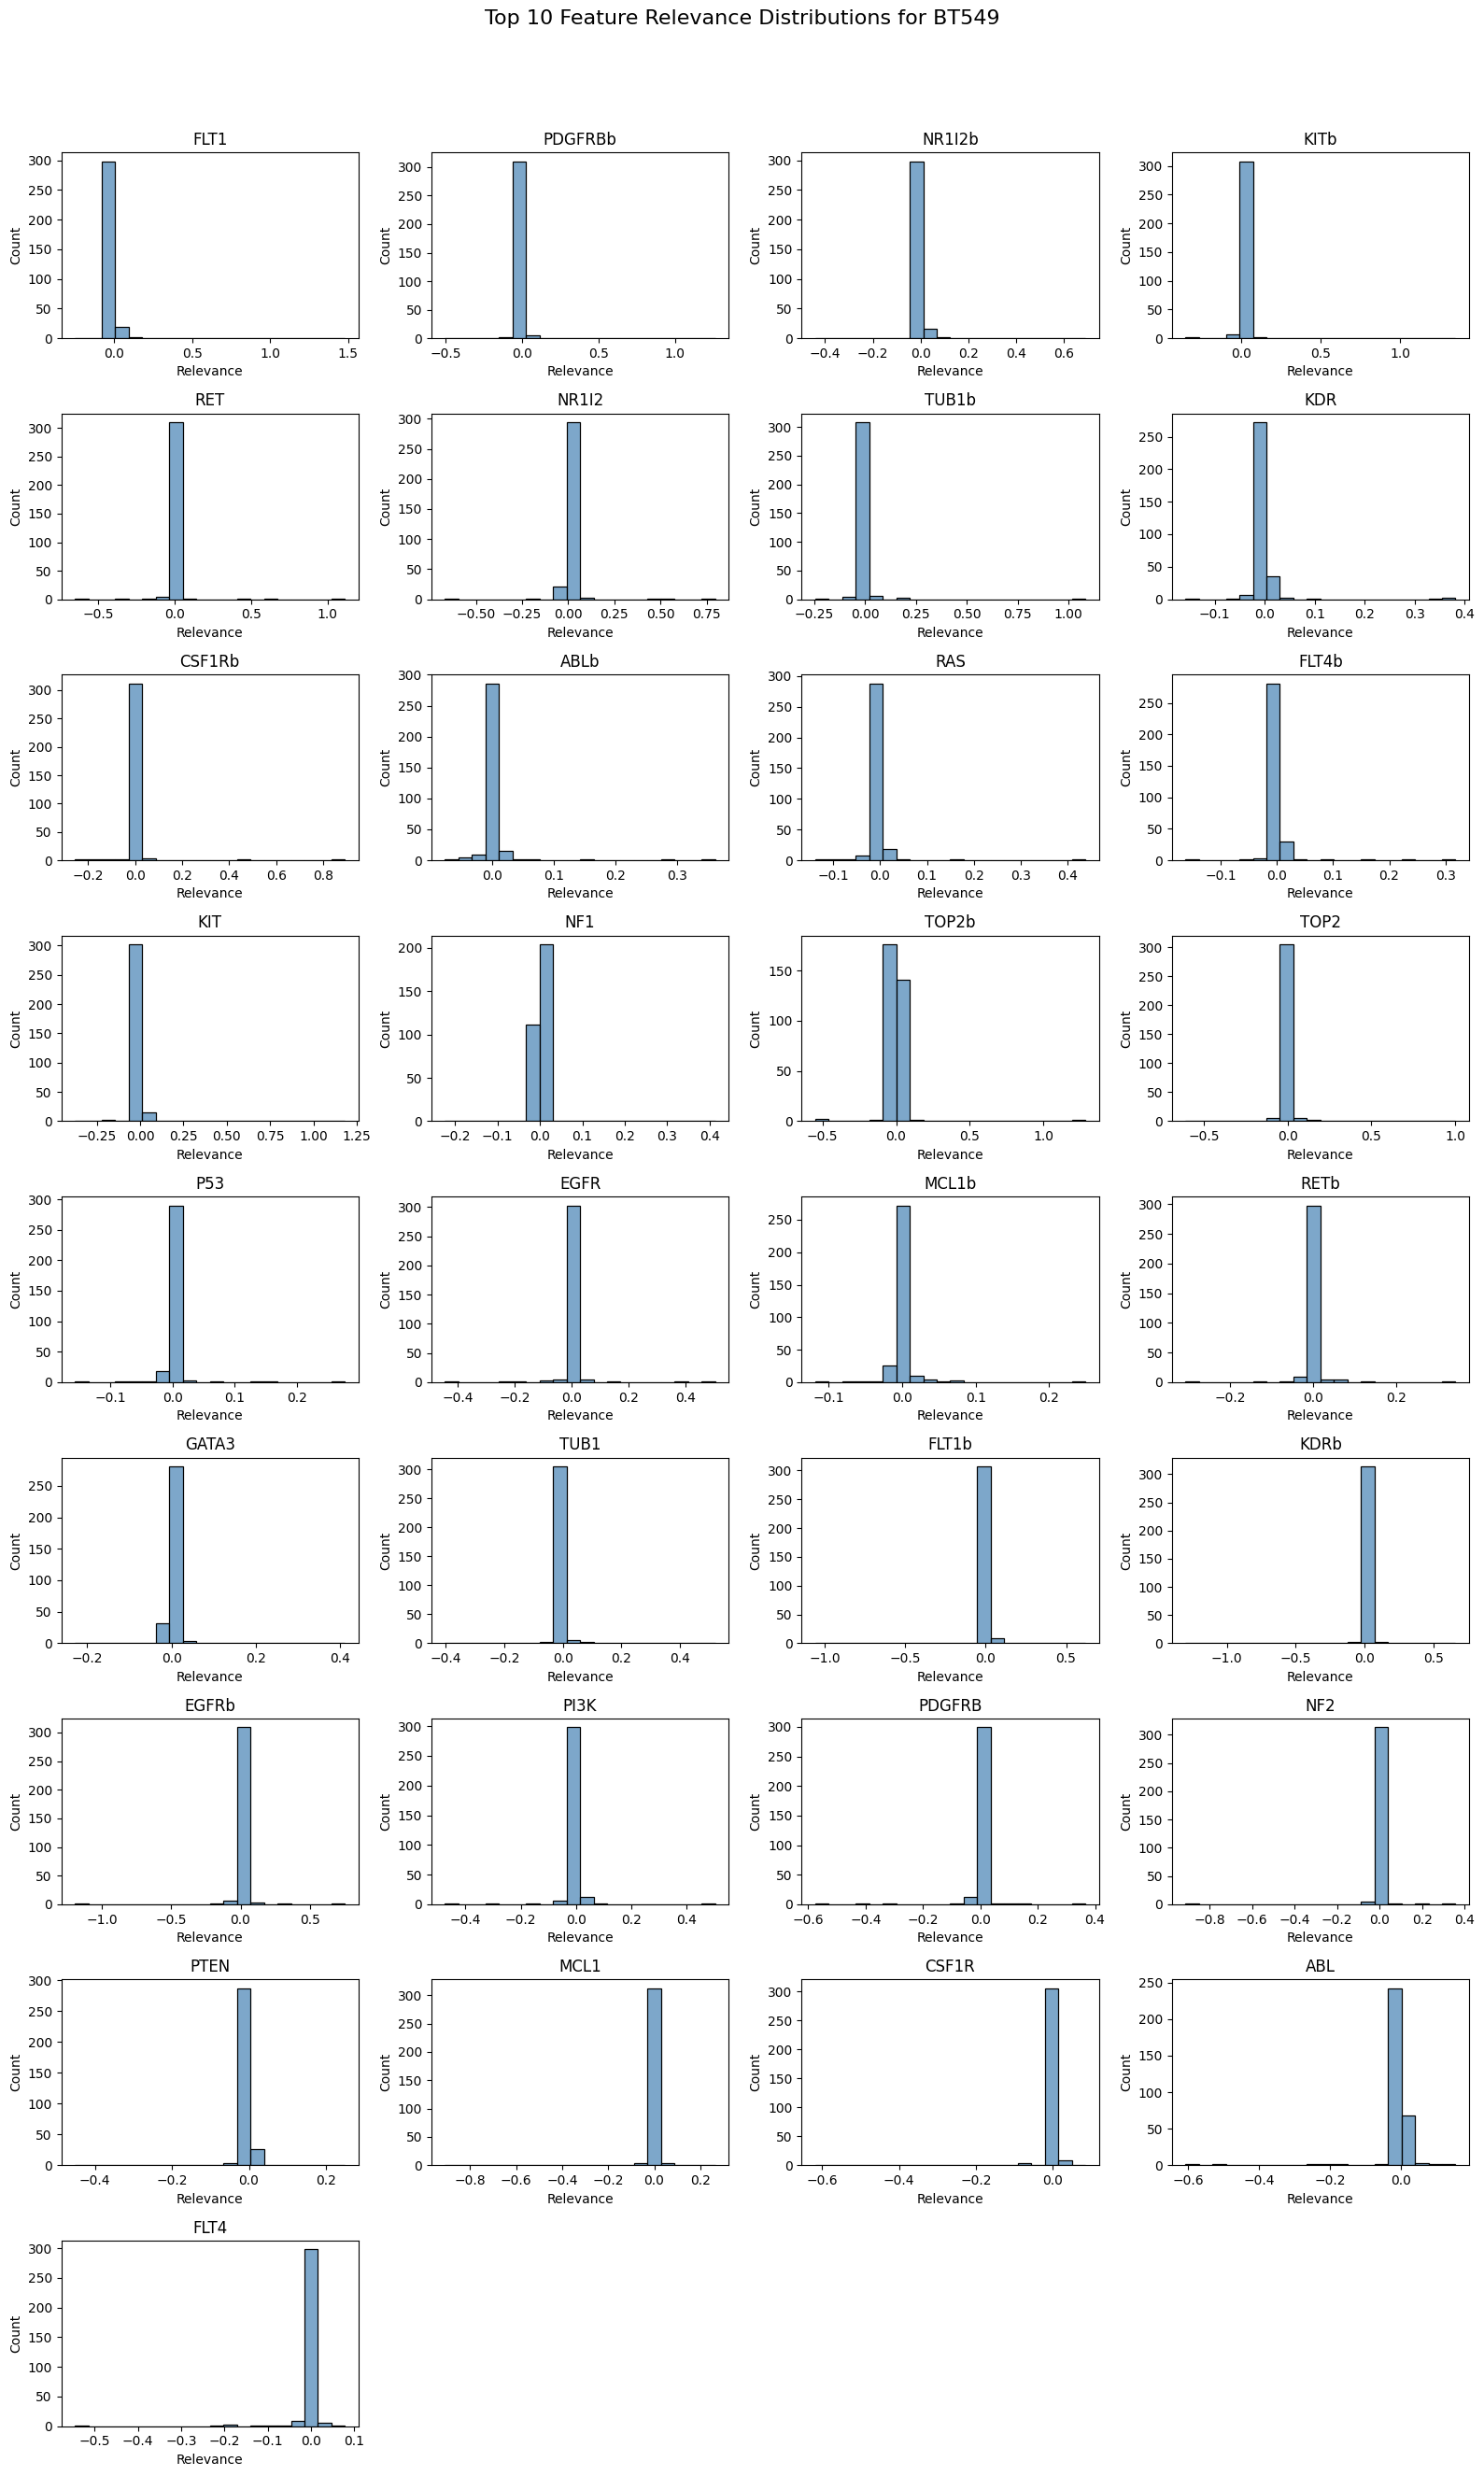


Top features for MCF7 (sorted by 90th percentile relevance in top synergy samples):
Feature                   Mean Relevance
--------------------------------------
NR1I2b                        0.0097
ABL                           0.0083
EGFRb                         0.0076
TUB1b                         0.0066
FLT1b                         0.0033
TOP2b                         0.0027
PDGFRBb                       0.0025
PDGFRB                        0.0015
NF2                           0.0007
PI3K                          0.0003
ABLb                          0.0003
FLT4b                        -0.0000
CSF1R                        -0.0017
MCL1b                        -0.0024
RETb                         -0.0026
EGFR                         -0.0030
PTEN                         -0.0031
KDR                          -0.0040
FLT4                         -0.0043
KIT                          -0.0050
P53                          -0.0053
TUB1                         -0.0058
CSF1Rb               

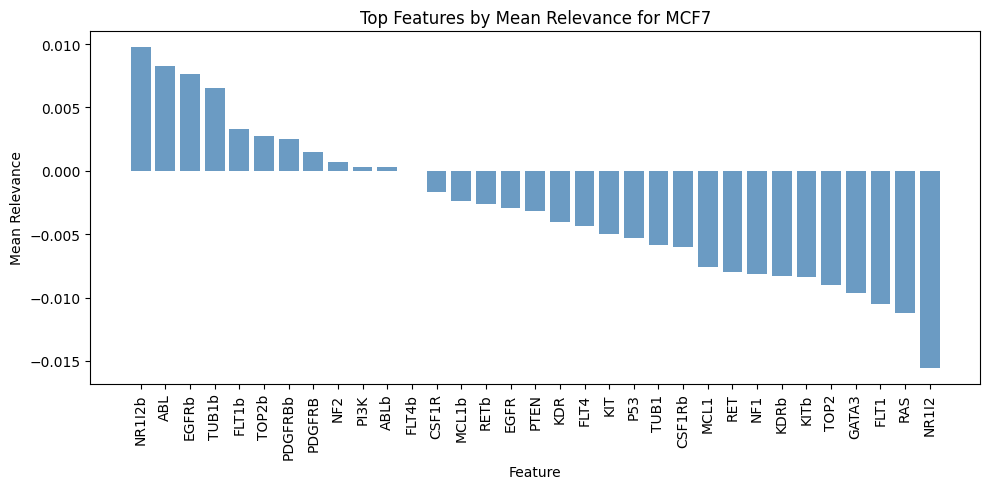

Number of samples for MCF7: 326


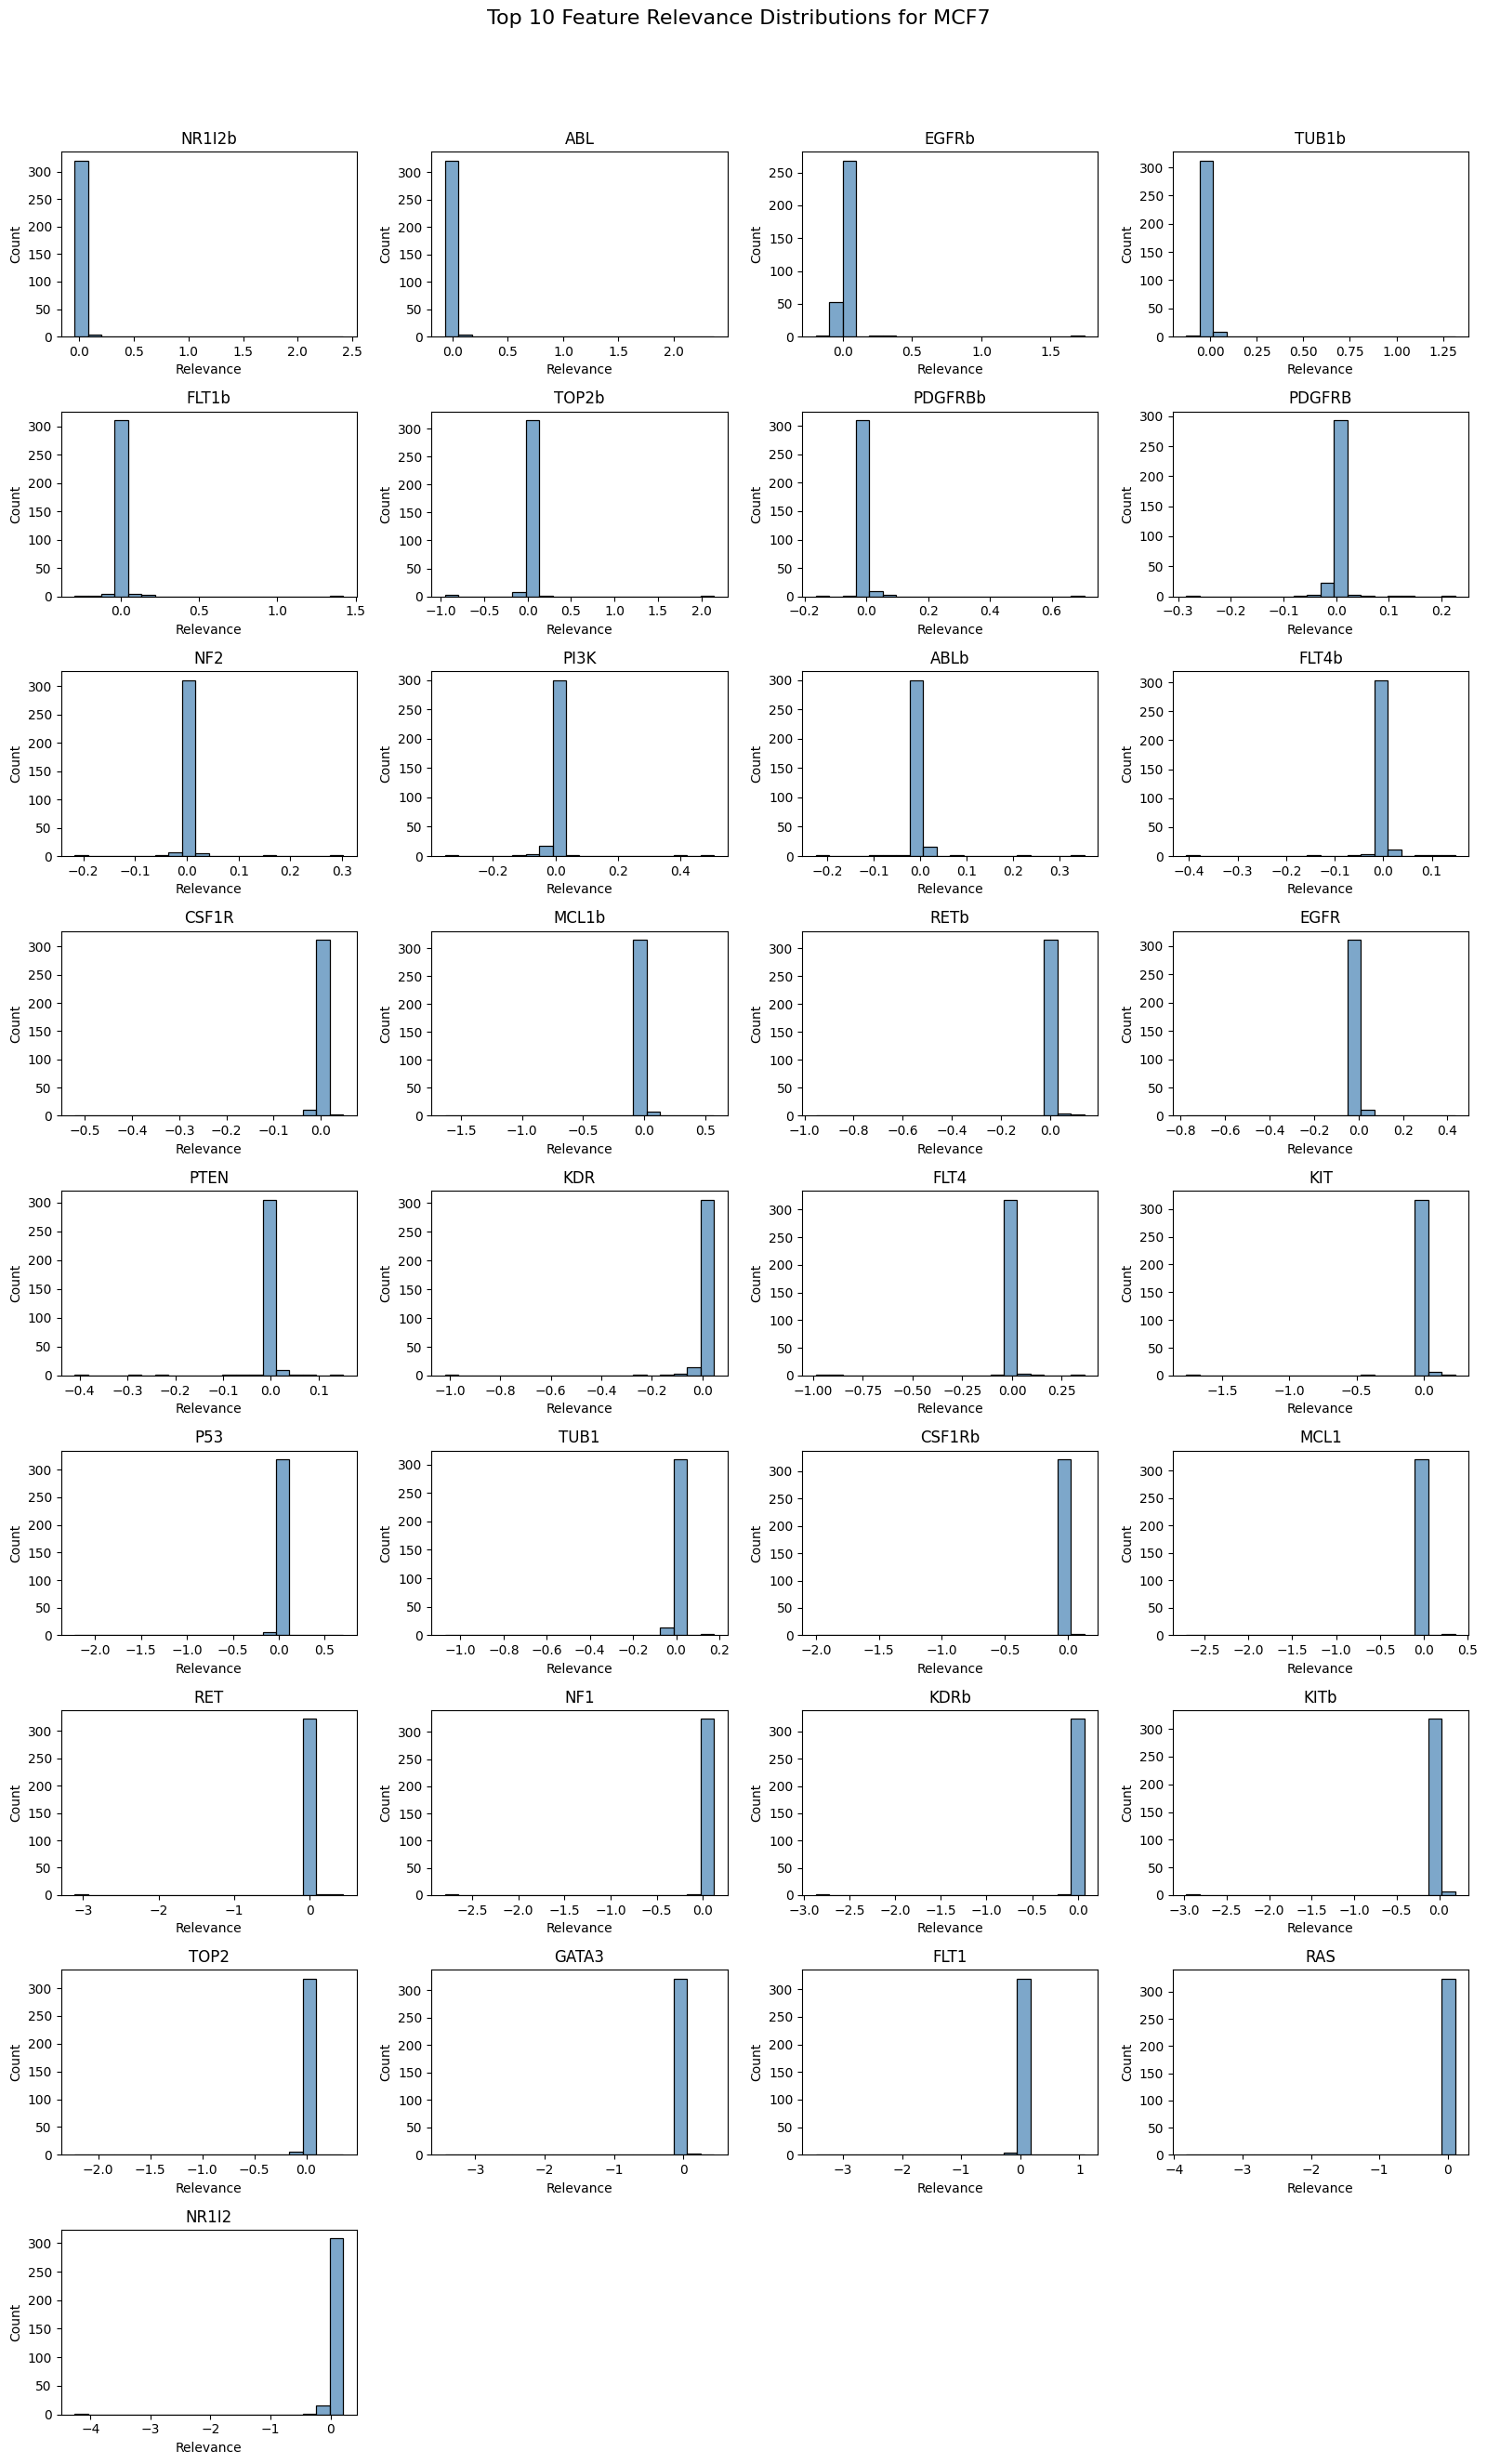


Top features for MDA-MB-231 (sorted by 90th percentile relevance in top synergy samples):
Feature                   Mean Relevance
--------------------------------------
TOP2b                         0.0037
KITb                          0.0037
PDGFRB                        0.0031
TOP2                          0.0029
RET                           0.0026
P53                           0.0018
RETb                          0.0017
FLT4b                         0.0015
CSF1Rb                        0.0014
NF1                           0.0014
ABL                           0.0014
MCL1                          0.0011
NF2                           0.0011
KDRb                          0.0011
PI3K                          0.0010
GATA3                         0.0008
FLT4                          0.0006
CSF1R                         0.0006
EGFRb                         0.0006
RAS                           0.0005
KDR                           0.0002
KIT                           0.0002
EGFR           

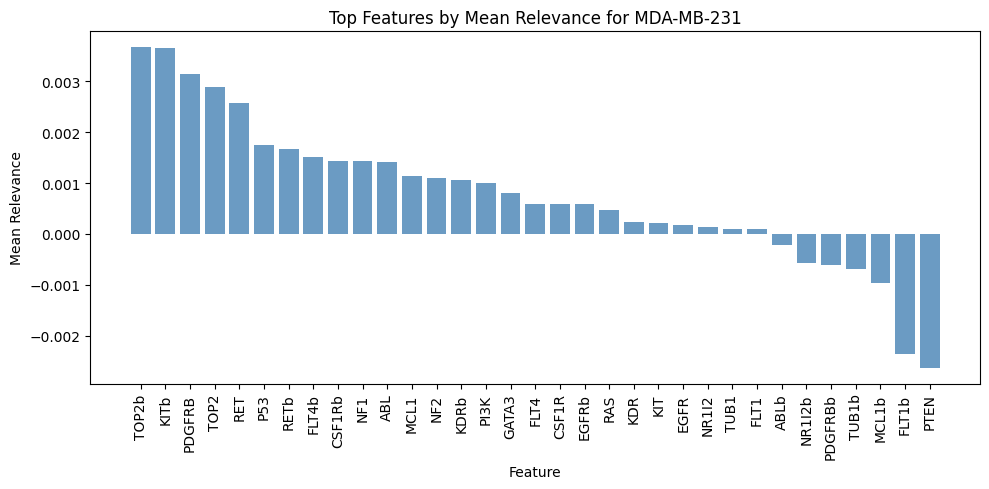

Number of samples for MDA-MB-231: 324


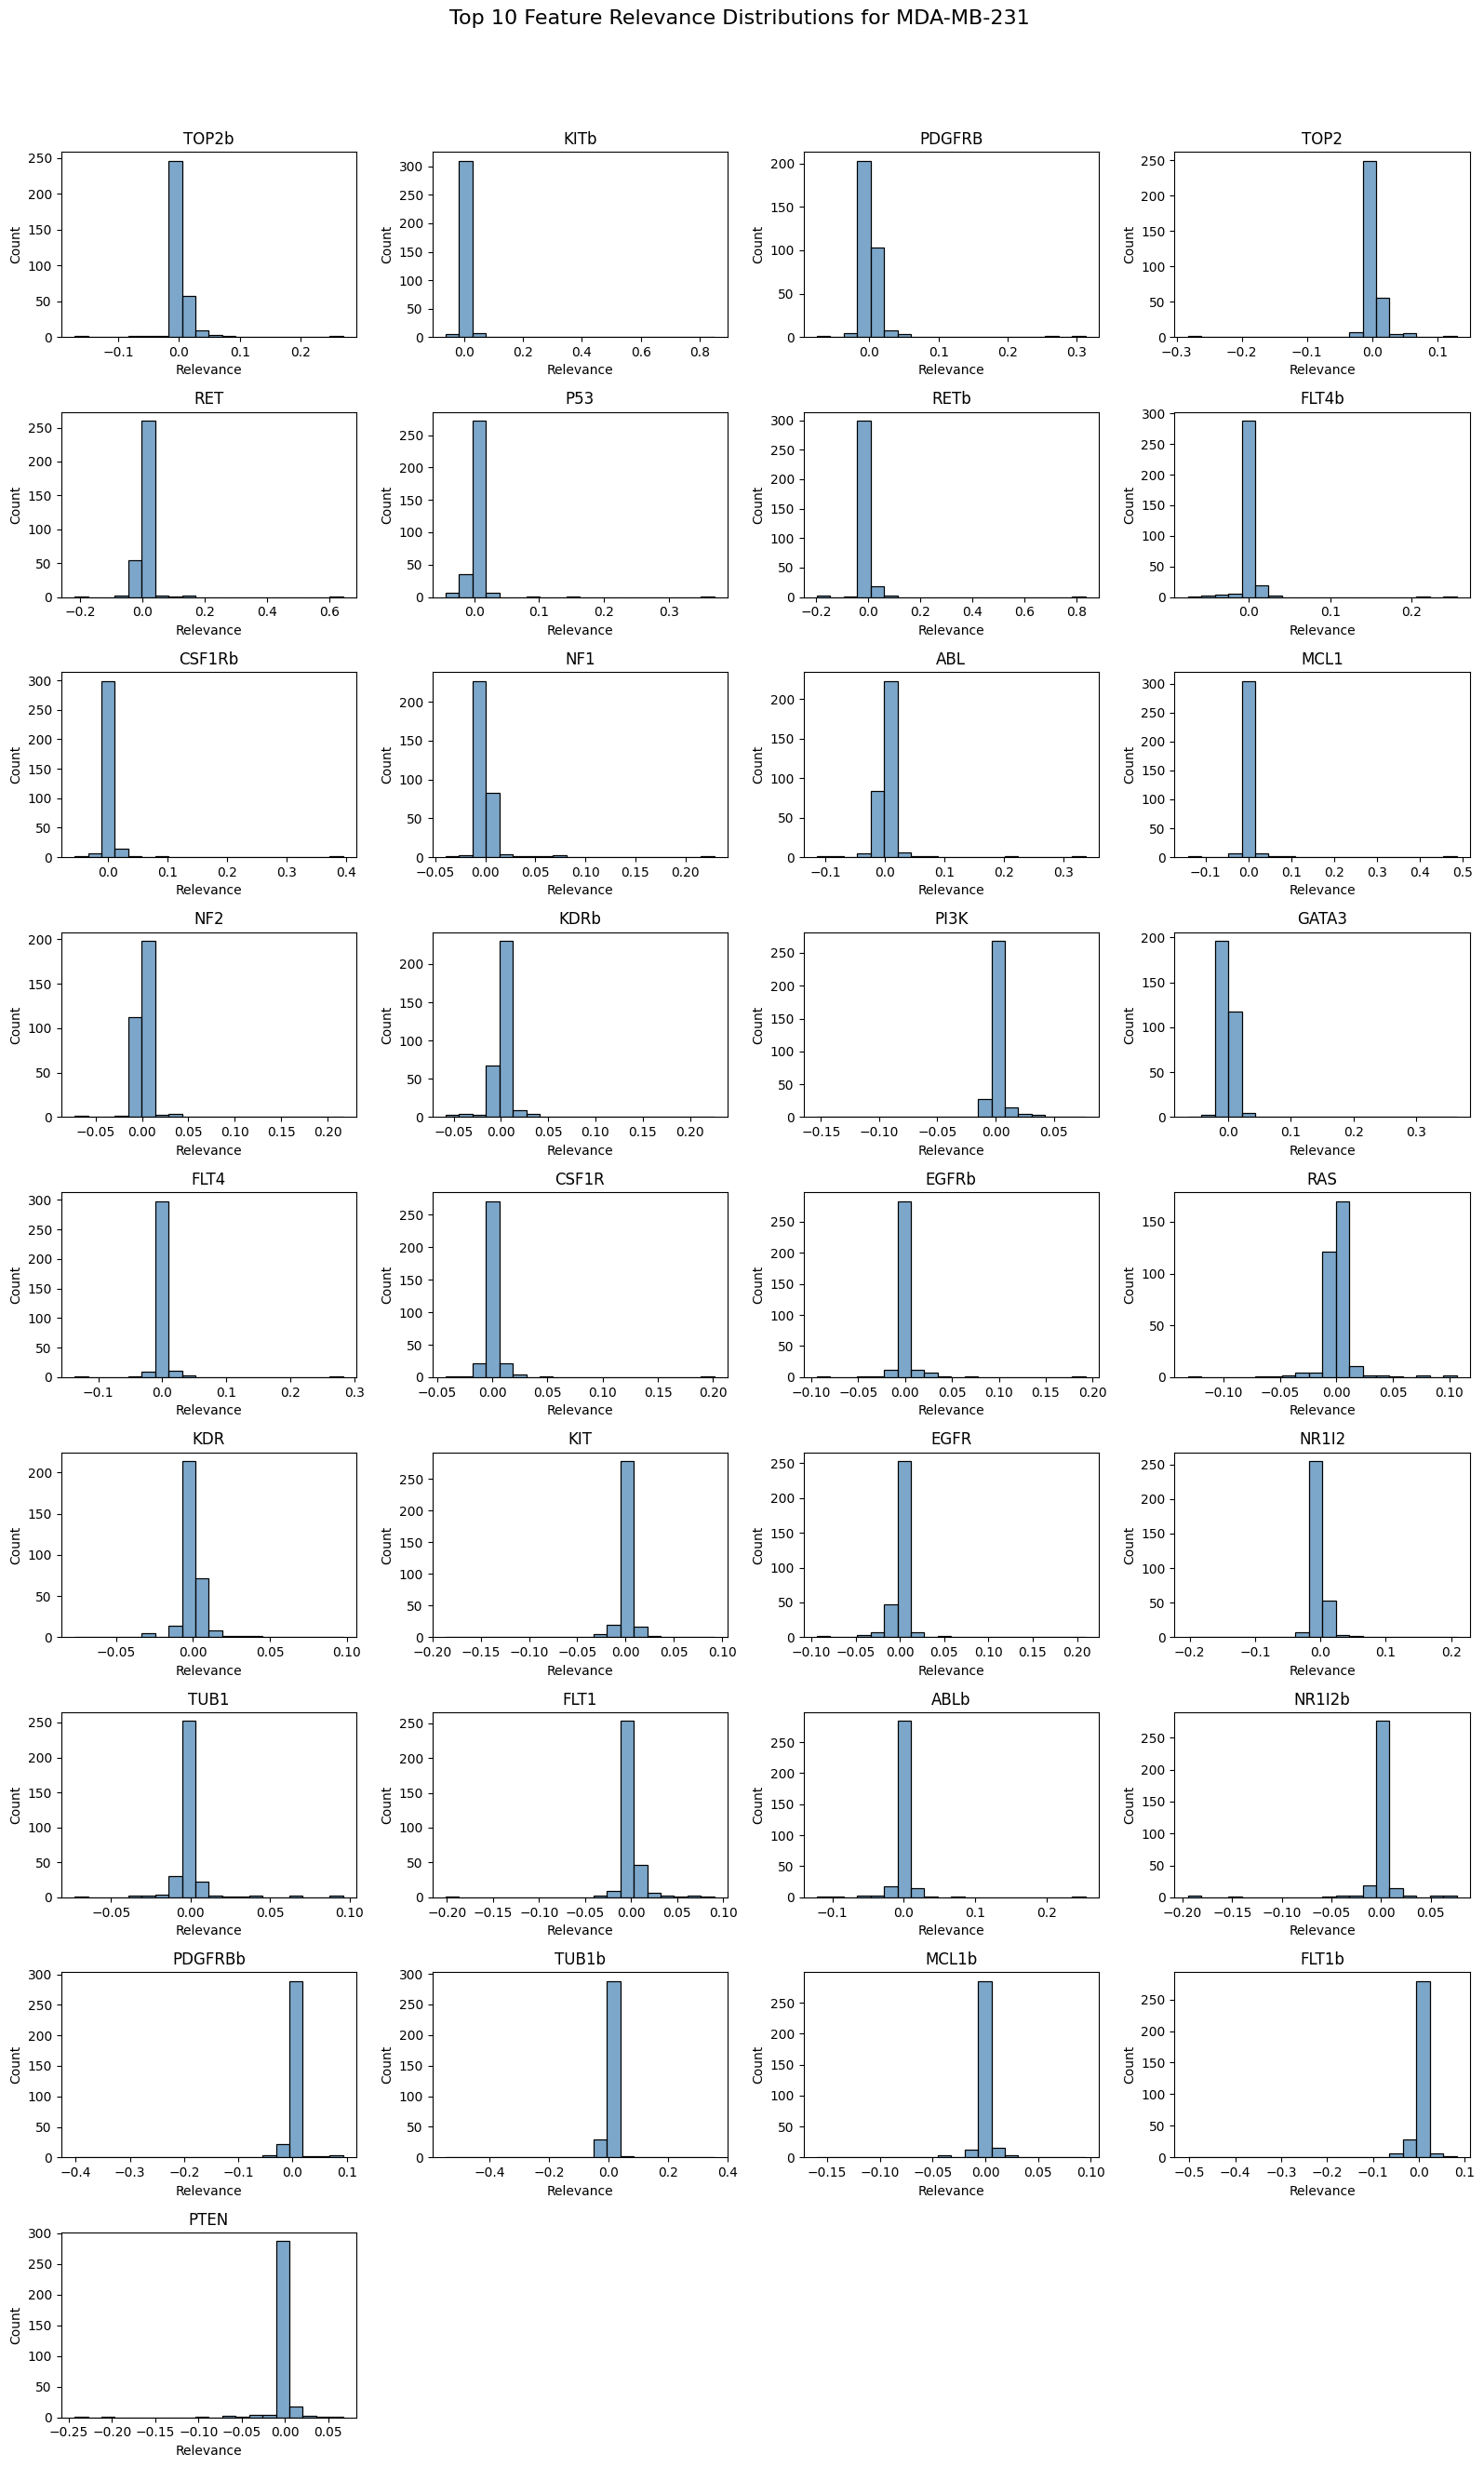


Top features for MDA-MB-468 (sorted by 90th percentile relevance in top synergy samples):
Feature                   Mean Relevance
--------------------------------------
RET                           0.0068
EGFRb                         0.0041
FLT4b                         0.0028
TOP2b                         0.0026
FLT1                          0.0023
MCL1                          0.0018
GATA3                         0.0013
KITb                          0.0003
RETb                          0.0002
KDRb                         -0.0000
TUB1b                        -0.0001
EGFR                         -0.0001
P53                          -0.0002
NF2                          -0.0003
PDGFRBb                      -0.0009
CSF1R                        -0.0009
ABL                          -0.0009
KDR                          -0.0017
FLT1b                        -0.0019
NR1I2                        -0.0021
PDGFRB                       -0.0021
NR1I2b                       -0.0022
KIT            

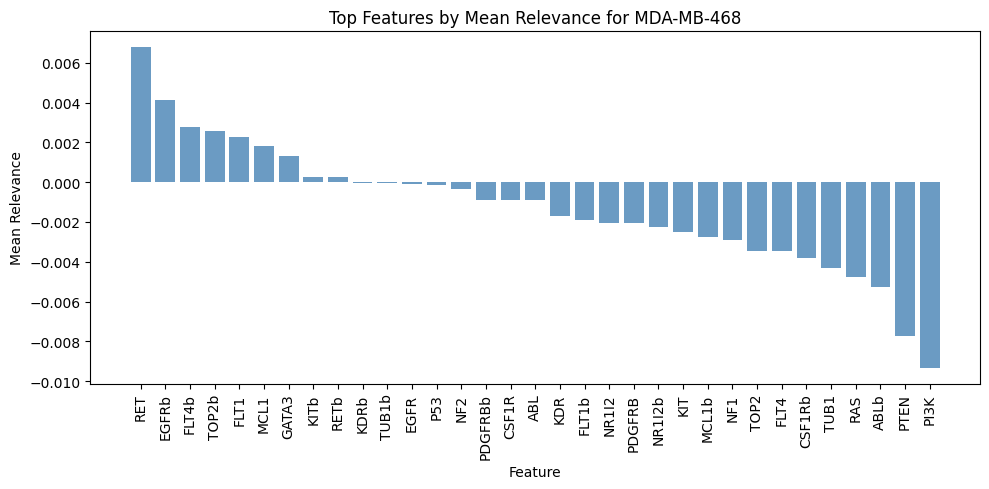

Number of samples for MDA-MB-468: 320


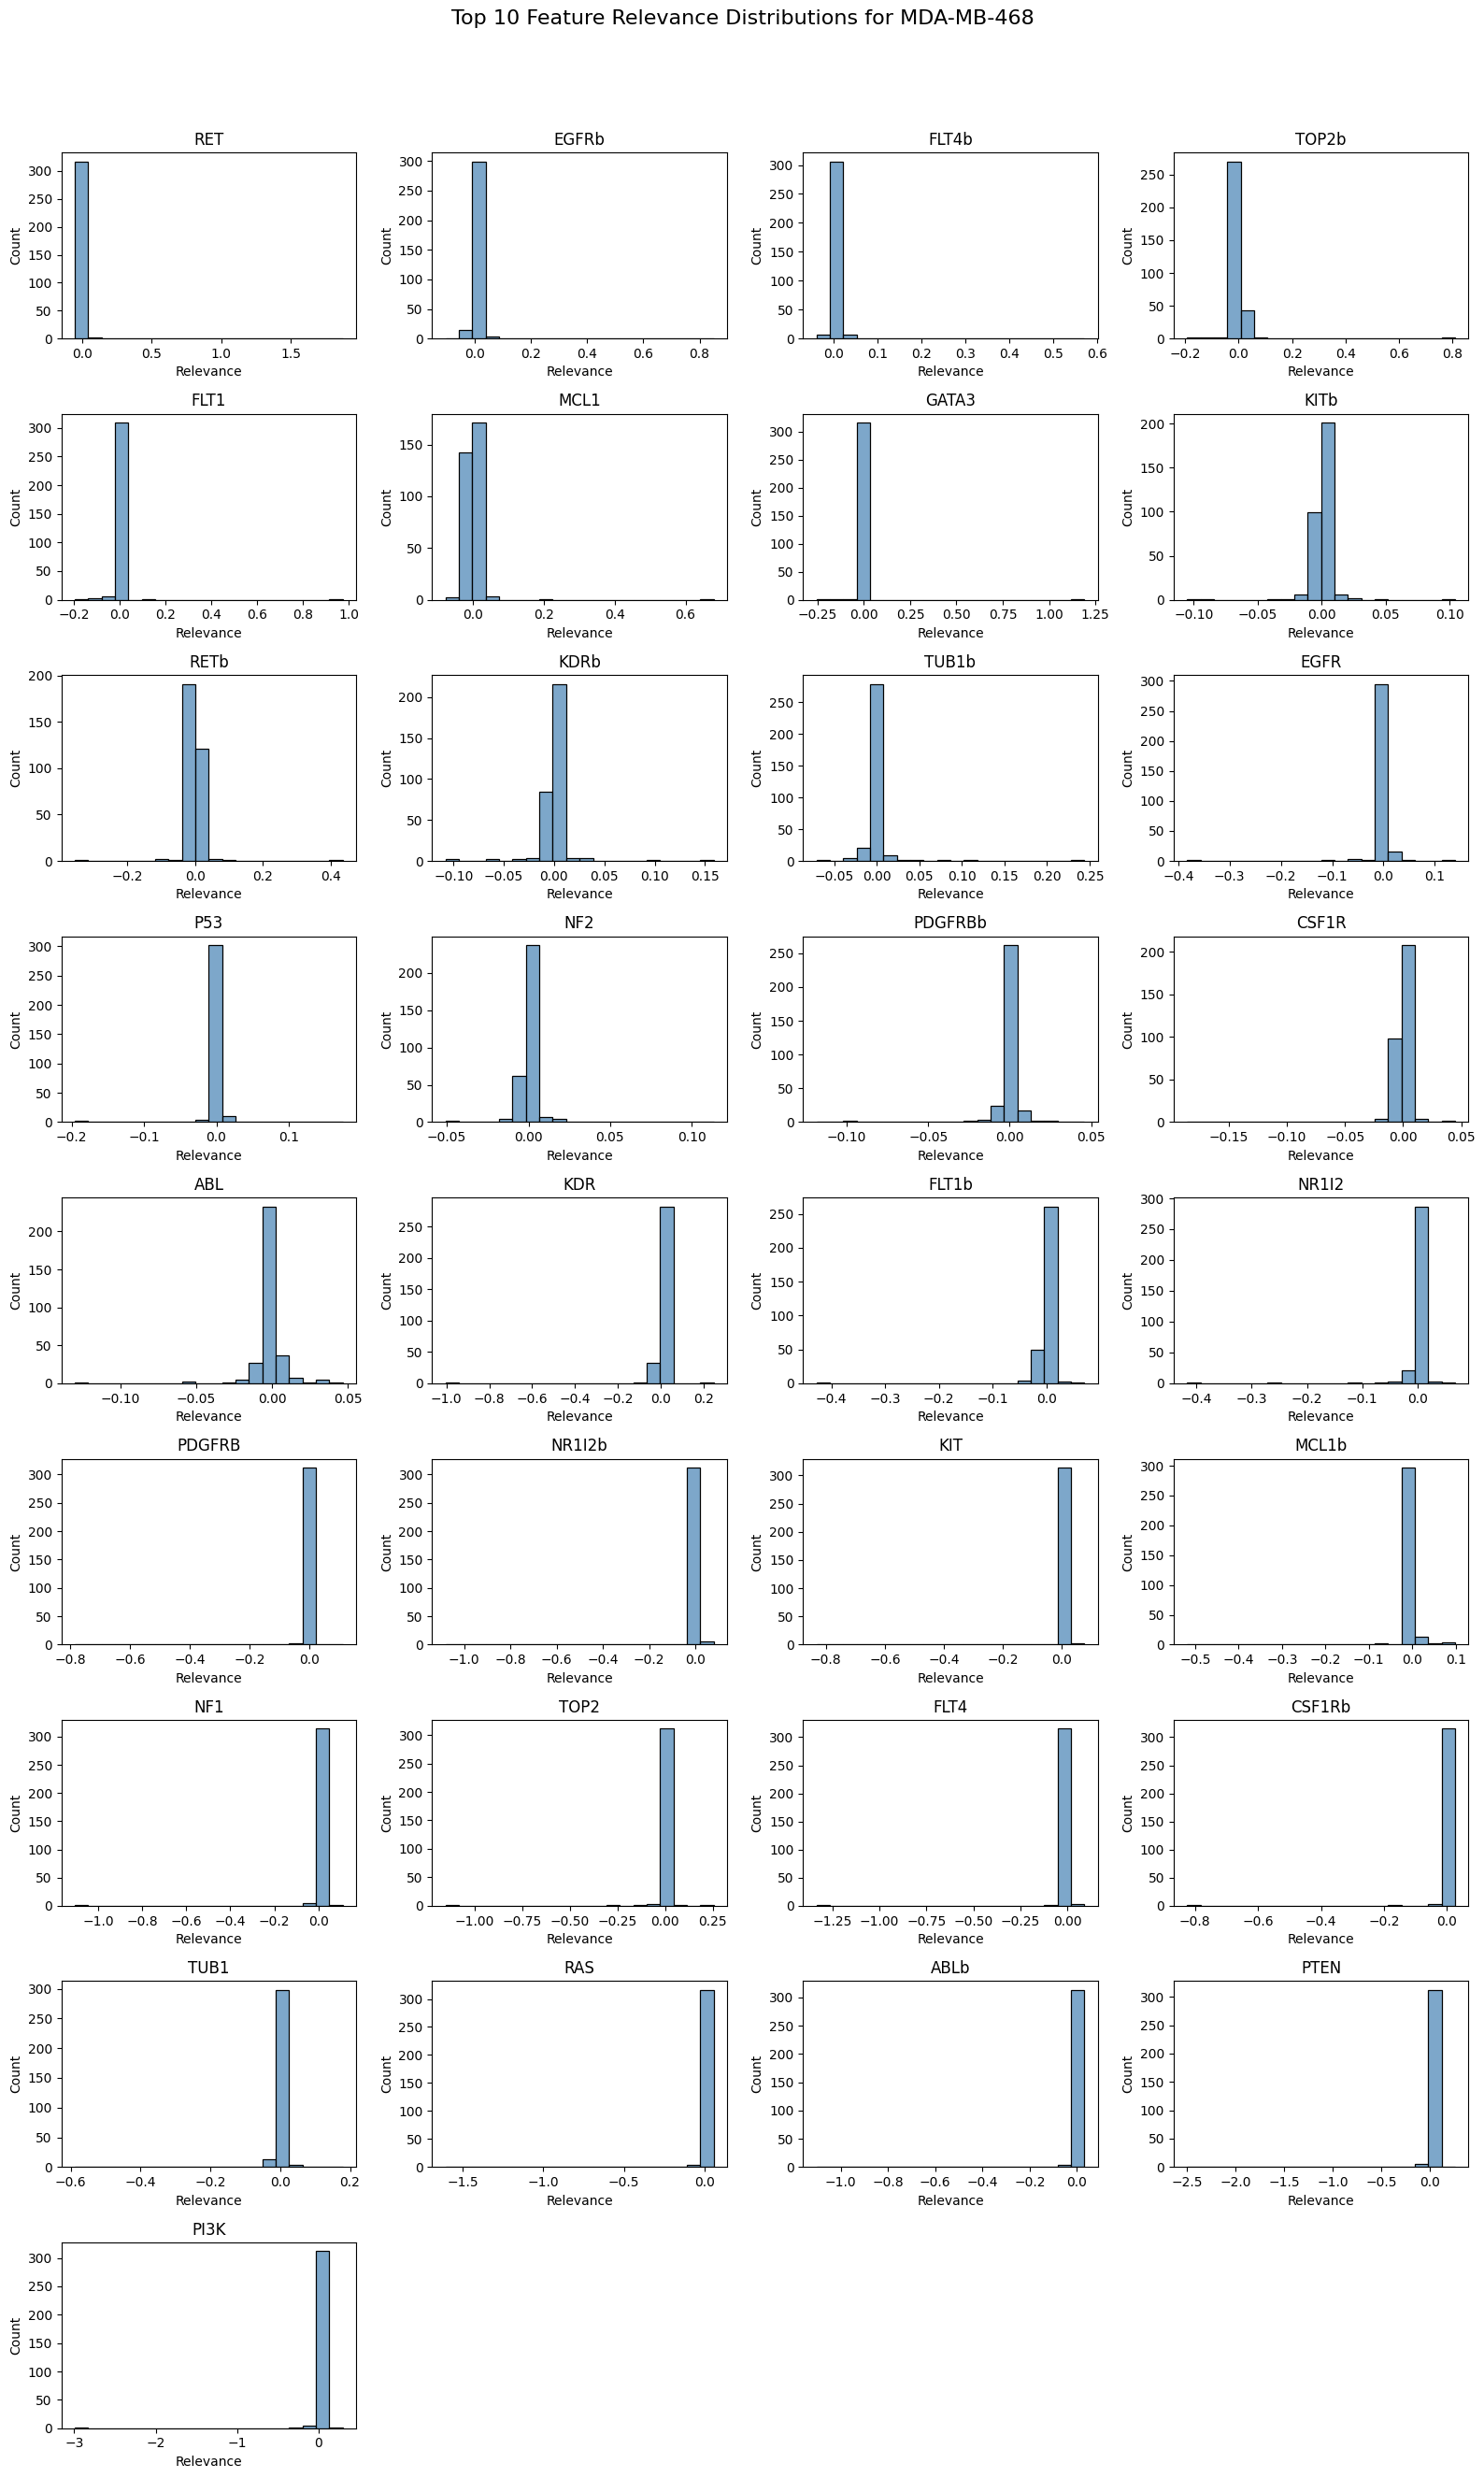


Top features for T47D (sorted by 90th percentile relevance in top synergy samples):
Feature                   Mean Relevance
--------------------------------------
TOP2b                         0.0080
NR1I2                         0.0027
PDGFRB                        0.0026
TOP2                          0.0024
KDRb                          0.0020
FLT1b                         0.0017
RET                           0.0014
PDGFRBb                       0.0010
FLT1                          0.0008
FLT4                          0.0008
KDR                           0.0005
RAS                           0.0003
CSF1R                         0.0002
EGFR                          0.0001
MCL1b                         0.0000
KITb                         -0.0005
TUB1                         -0.0005
NF1                          -0.0009
CSF1Rb                       -0.0013
P53                          -0.0015
KIT                          -0.0016
ABL                          -0.0017
RETb                 

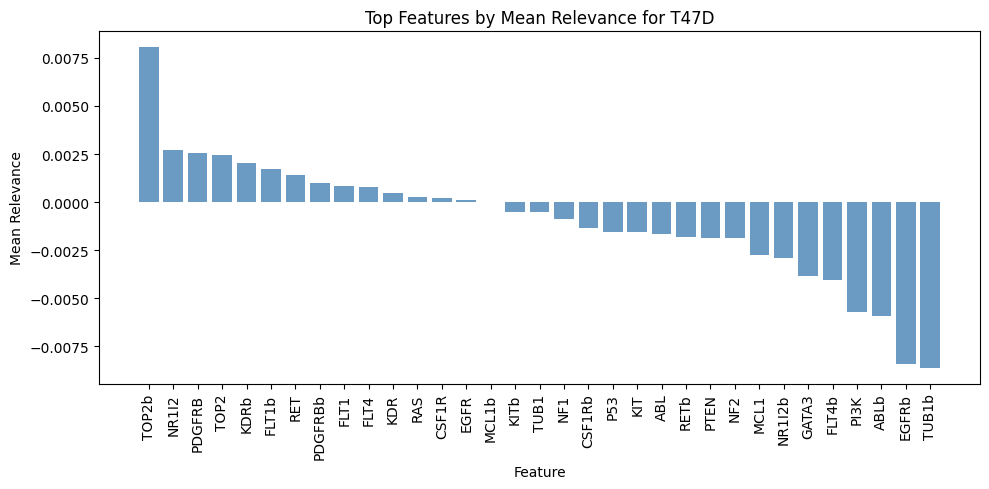

Number of samples for T47D: 322


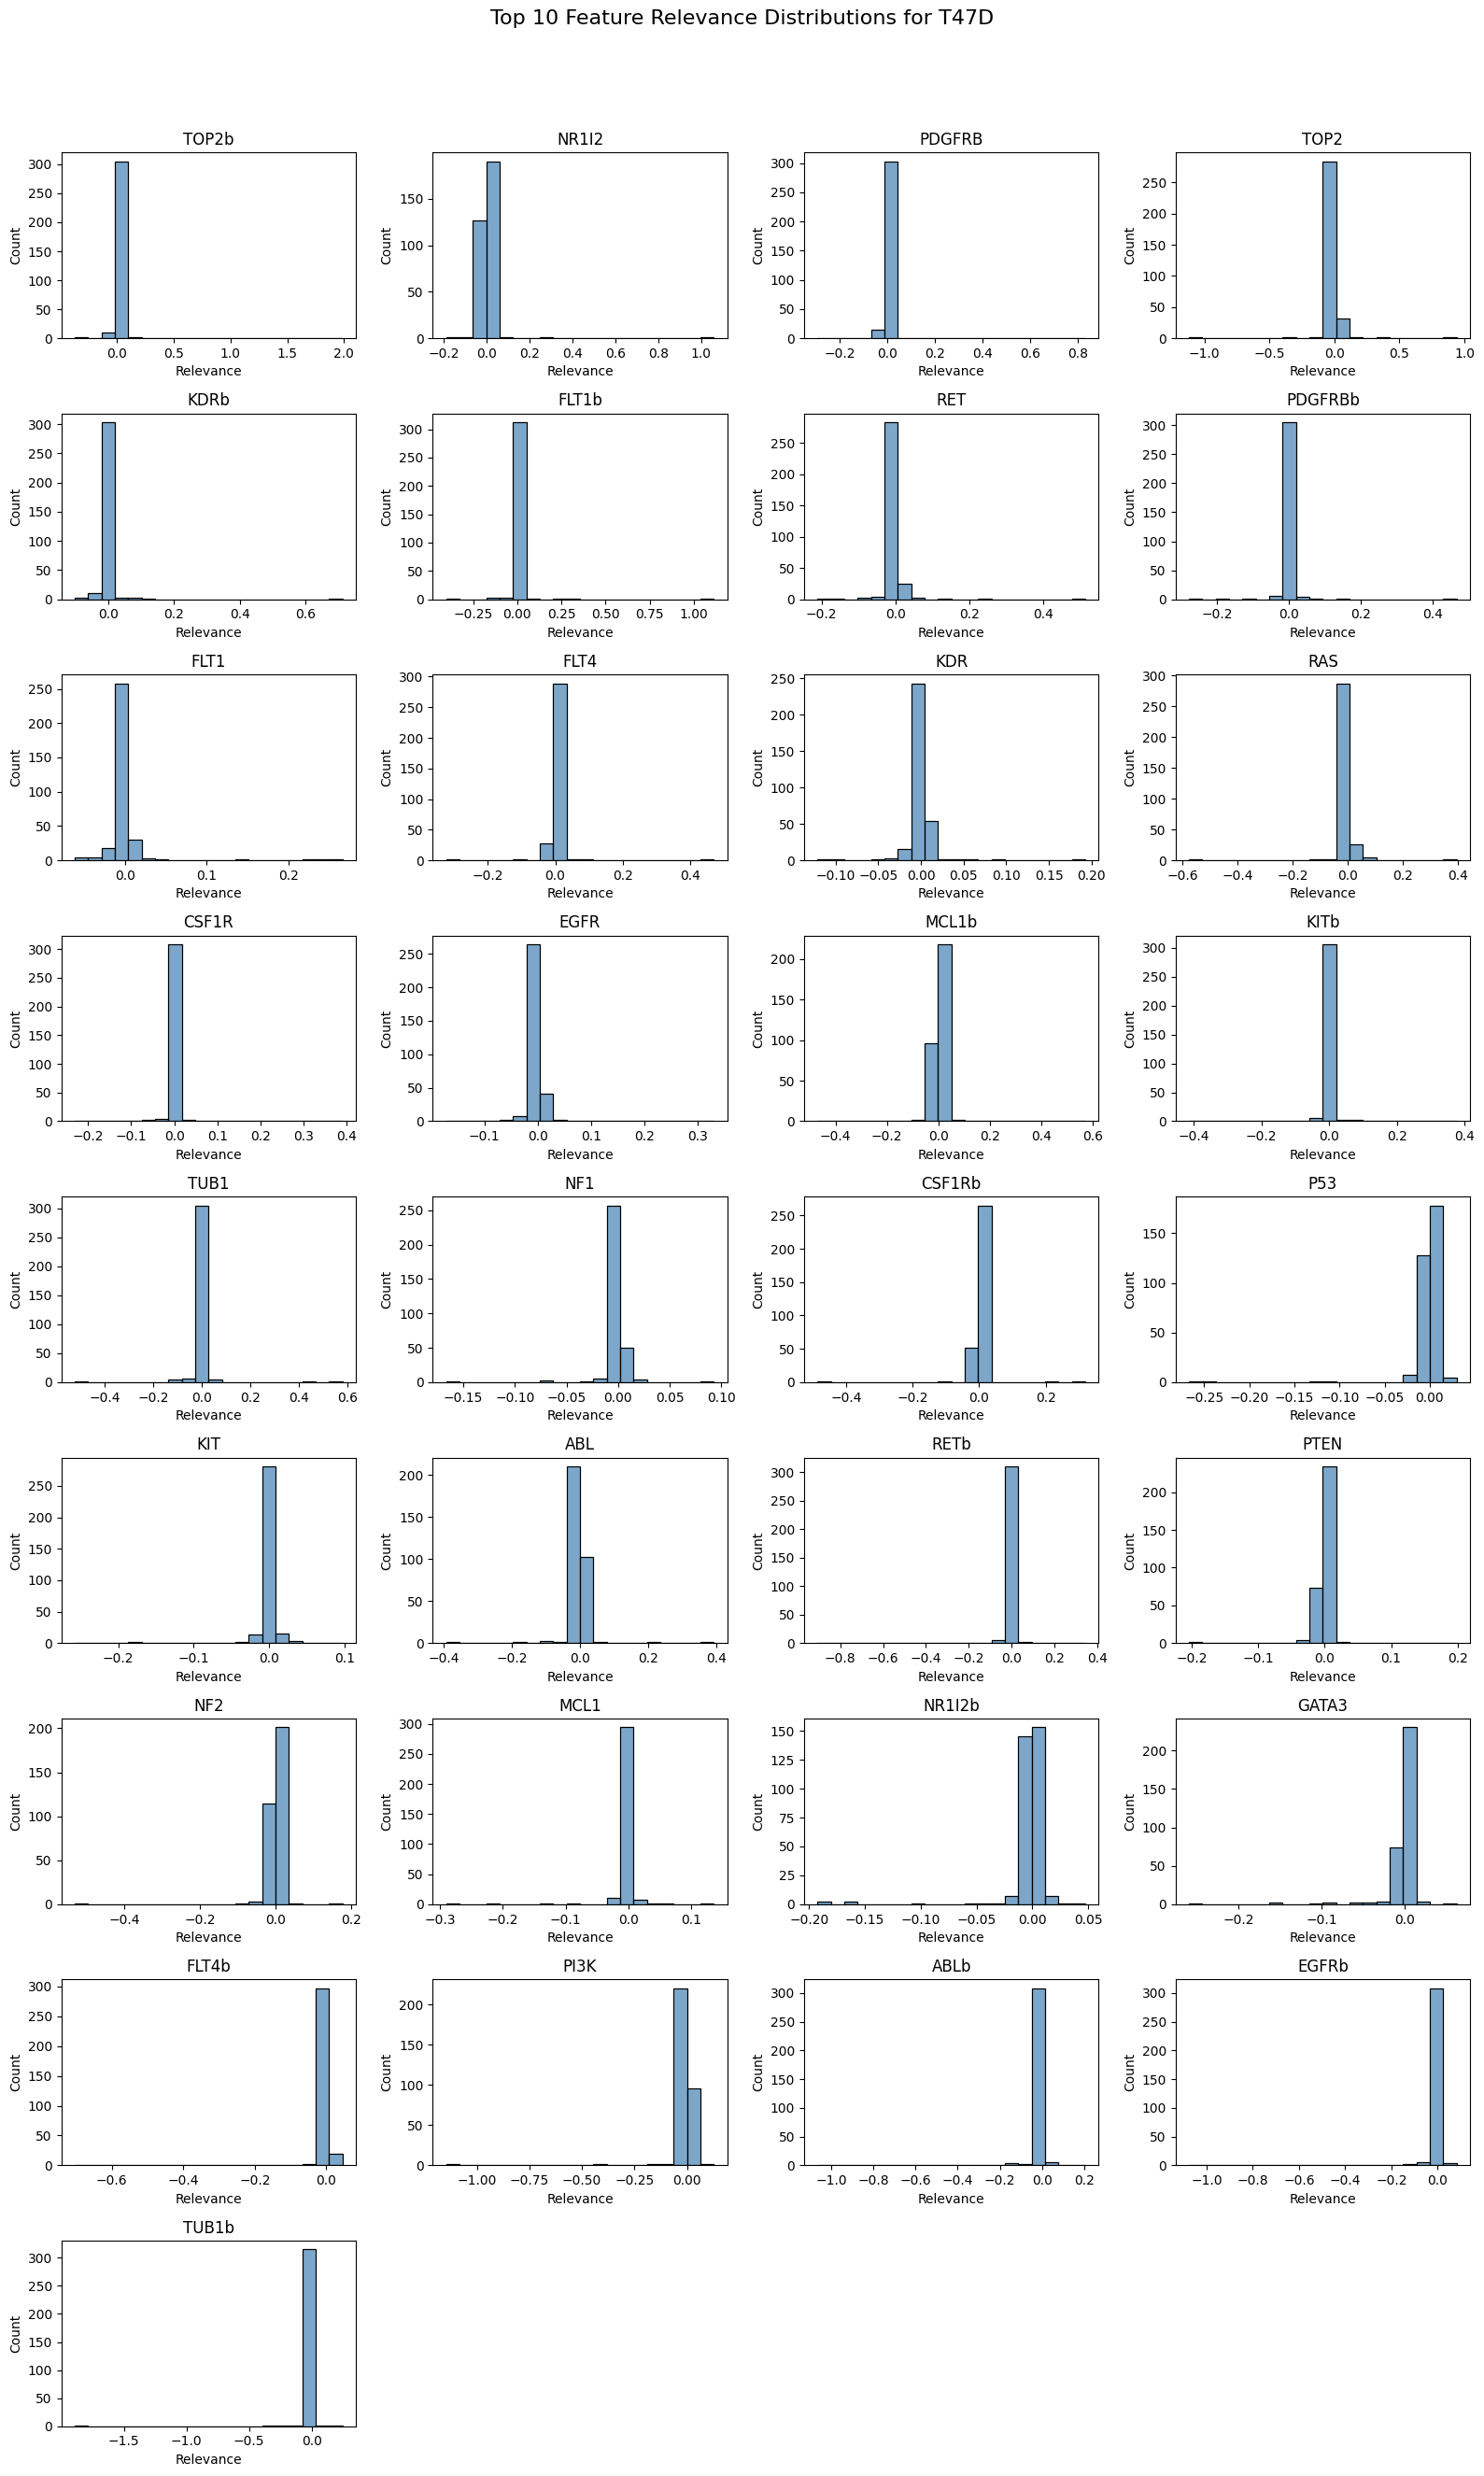

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def show_small_multiple_histograms(mask, title_suffix="", selected_features=None):
    relevances_filtered = relevances[mask]
    Y_filtered = Y[mask]
    y_values = np.array(Y_filtered).reshape(-1)
    print(f"Number of samples for {title_suffix}: {len(y_values)}")

    if len(y_values) == 0:
        print(f"Skipping {title_suffix} — no samples after filtering.")
        return

    if selected_features is None:
        features_to_plot = feature_names
    else:
        features_to_plot = selected_features

    data = pd.DataFrame(relevances_filtered, columns=feature_names)

    num_features = len(features_to_plot)
    ncols = 4
    nrows = (num_features + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=False, sharey=False)
    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        ax = axes[i]
        sns.histplot(
            data[feature],
            bins=20,
            kde=False,
            ax=ax,
            color='steelblue',
            alpha=0.7
        )
        ax.set_title(feature)
        ax.set_xlabel("Relevance")
        ax.set_ylabel("Count")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Top 10 Feature Relevance Distributions for {title_suffix}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Usage:
cell_line_names = np.unique(cell_line_data)
for cell_line_name in cell_line_names:
    mask = cell_line_data == cell_line_name
    Y_cell_line = Y[mask]

    if len(Y_cell_line) == 0:
        print(f"No samples for {cell_line_name}")
        continue

    synergy_90 = np.percentile(Y_cell_line, 90)
    top_synergy_mask = Y_cell_line >= synergy_90

    # Create final mask with indices in the original array
    new_mask = np.zeros_like(Y, dtype=bool)
    new_mask[mask] = top_synergy_mask

    if np.sum(new_mask) == 0:
        print(f"No top 10% synergy samples for {cell_line_name}")
        continue

    relevances_filtered = relevances[new_mask]
    means = np.mean(relevances_filtered, axis=0)


    print(f"\nTop features for {cell_line_name} (sorted by 90th percentile relevance in top synergy samples):")
    print("{:<25s} {:>10s}".format("Feature", "Mean Relevance"))
    print("-" * 38)
    # sort by bean relevance 
    features = np.array(feature_names)[np.argsort(means)[::-1]]
    means = means[np.argsort(means)[::-1]]
    for feat, mean_val in zip(features, means):
        print(f"{feat:<25s} {mean_val:10.4f}")
        
    plt.figure(figsize=(10, 5))
    plt.bar(features, means, color='steelblue', alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Mean Relevance")
    plt.title(f"Top Features by Mean Relevance for {cell_line_name}")
    plt.tight_layout()
    plt.show()

    show_small_multiple_histograms(new_mask, title_suffix=cell_line_name, selected_features=features)


Number of samples for BT549: 1274


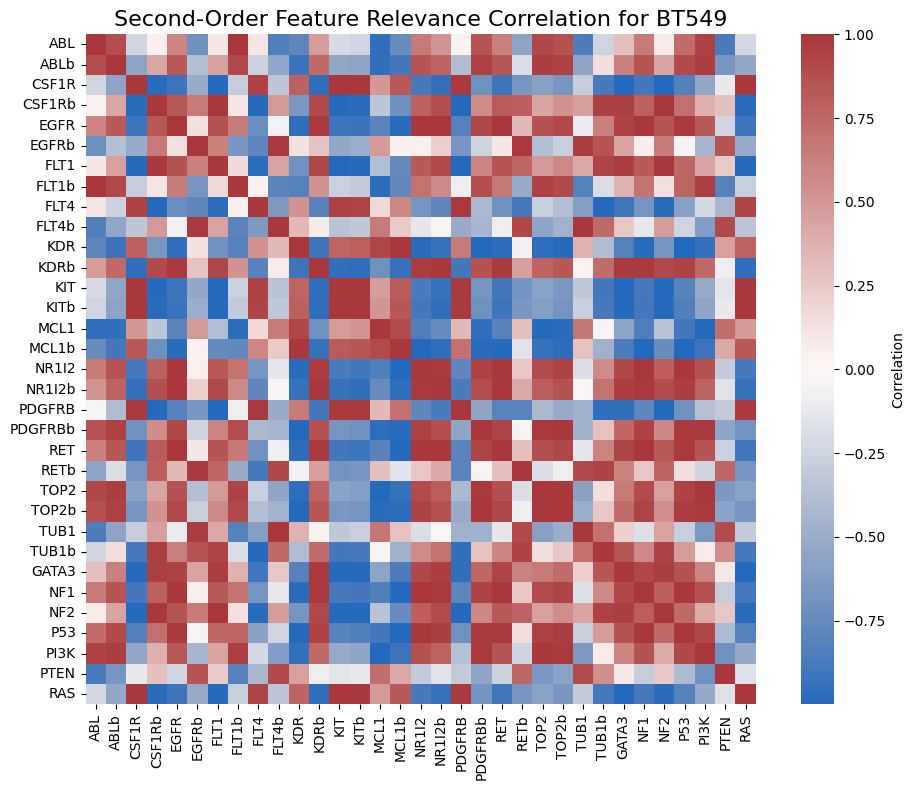

Number of samples for MCF7: 1098


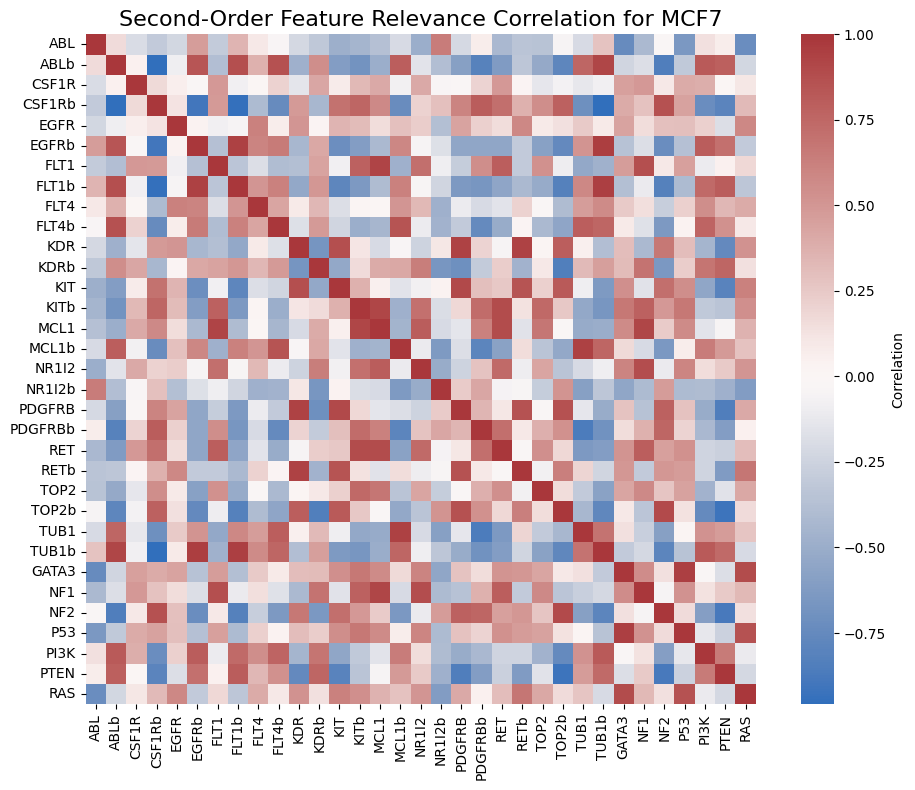

Number of samples for MDA-MB-231: 882


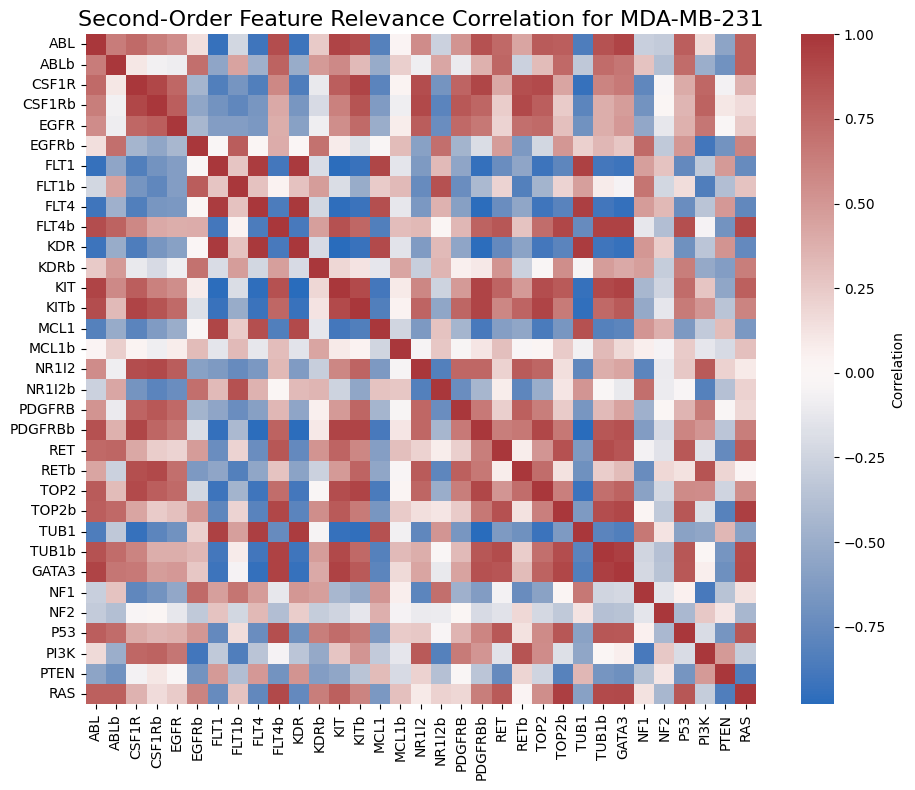

Number of samples for MDA-MB-468: 1242


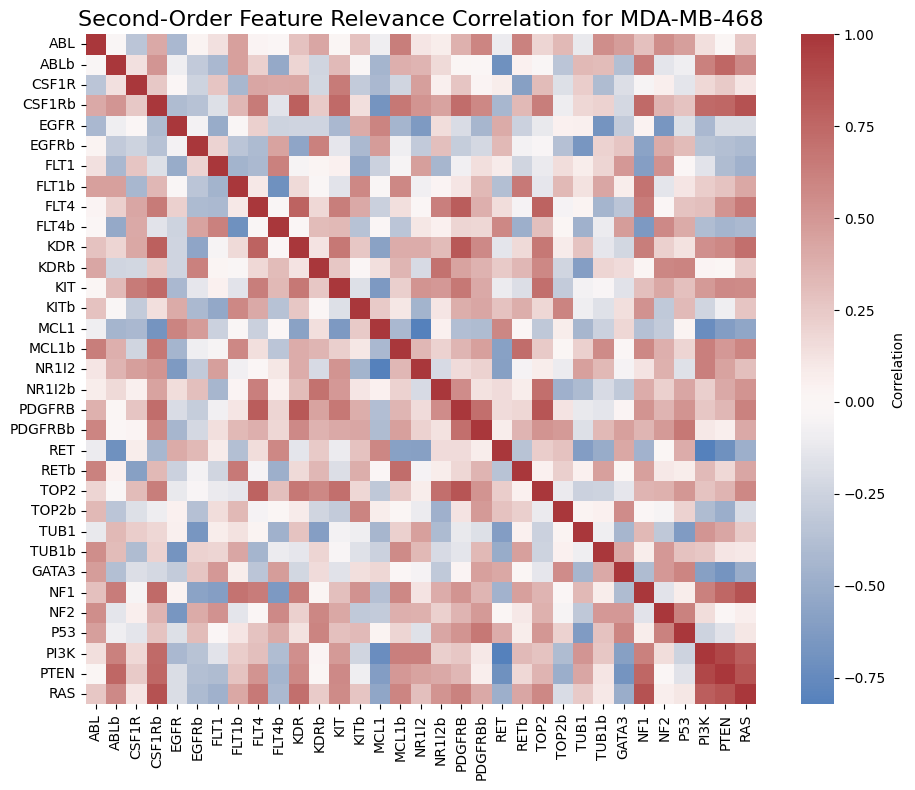

Number of samples for T47D: 1158


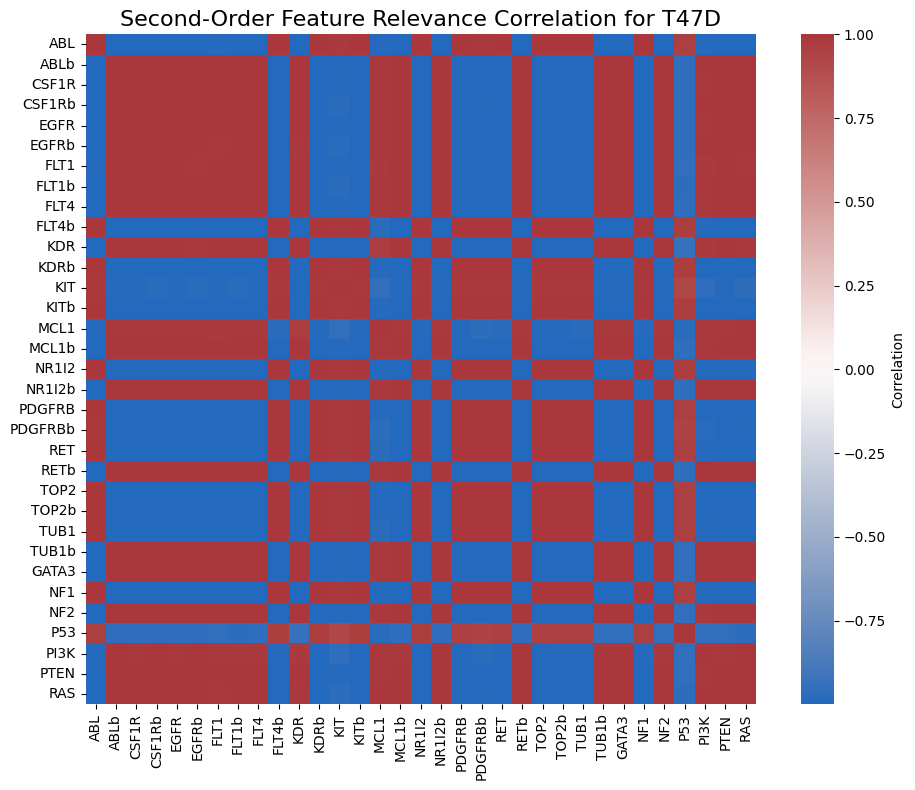

In [10]:
# get second order plot 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def show_second_order_relevances(mask, title_suffix=""):
    relevances_filtered = relevances[mask]
    Y_filtered = Y[mask]
    y_values = np.array(Y_filtered).reshape(-1)

    if len(y_values) == 0:
        print(f"Skipping {title_suffix} — no samples after filtering.")
        return

    print(f"Number of samples for {title_suffix}: {len(y_values)}")

    df = pd.DataFrame(relevances_filtered, columns=feature_names)
    second_order = df.corr().fillna(0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(second_order, cmap="vlag", center=0, square=True, cbar_kws={"label": "Correlation"})
    plt.title(f"Second-Order Feature Relevance Correlation for {title_suffix}", fontsize=16)
    plt.tight_layout()
    plt.show()


cell_line_names = np.unique(cell_line_data)
for cell_line_name in cell_line_names:
    mask = cell_line_data == cell_line_name
    positive_mask = Y > 0
    new_mask = mask & positive_mask
    show_second_order_relevances(new_mask, title_suffix=cell_line_name)


## Transynergy

In [11]:
print(model_trans)

TransposeMultiTransformersPlusLinear(
  (linear_layers): ModuleList(
    (0-2): 3 x Linear(in_features=2402, out_features=400, bias=True)
  )
  (norms): ModuleList(
    (0-2): 3 x Norm()
  )
  (dropouts): ModuleList(
    (0-2): 3 x Dropout(p=0.2, inplace=False)
  )
  (transformer_list): ModuleList(
    (0): Transformer(
      (encoder): Encoder(
        (layers): ModuleList(
          (0): EncoderLayer(
            (norm_1): Norm()
            (norm_2): Norm()
            (attn): MultiHeadAttention(
              (q_linear): Linear(in_features=3, out_features=3, bias=True)
              (v_linear): Linear(in_features=3, out_features=3, bias=True)
              (k_linear): Linear(in_features=3, out_features=3, bias=True)
              (dropout): Dropout(p=0.2, inplace=False)
              (out): Linear(in_features=3, out_features=3, bias=True)
            )
            (ff): FeedForward(
              (linear_1): Linear(in_features=3, out_features=3, bias=True)
              (dropout): 